#1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 150
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
df.duplicated().sum()

0

<Axes: xlabel='Delivery Time', ylabel='Density'>

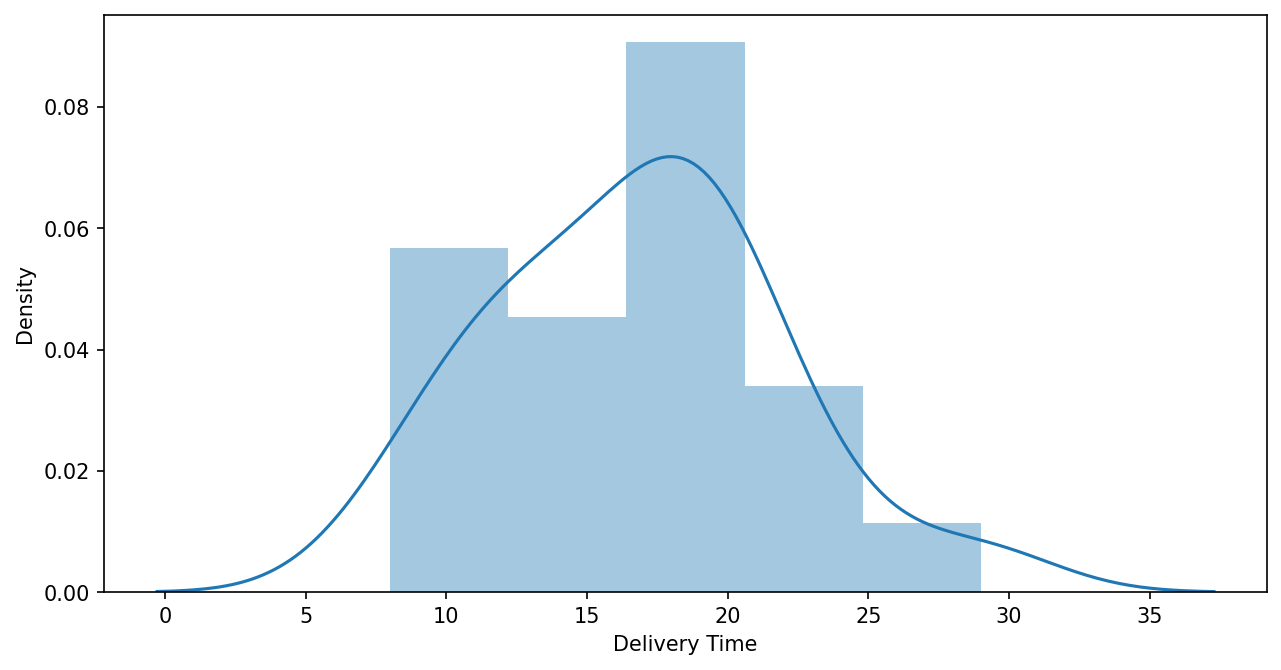

In [6]:
sns.distplot(df["Delivery Time"])

<Axes: xlabel='Sorting Time', ylabel='Density'>

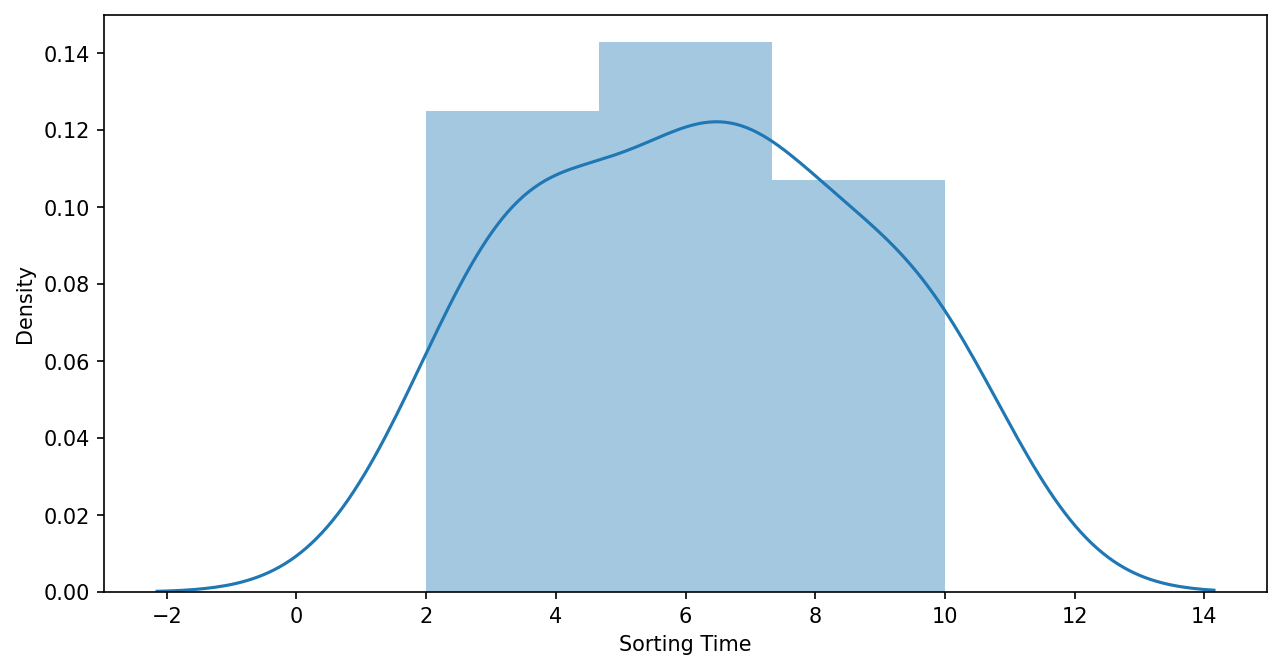

In [7]:
sns.distplot(df["Sorting Time"])

<Axes: xlabel='Delivery Time', ylabel='Sorting Time'>

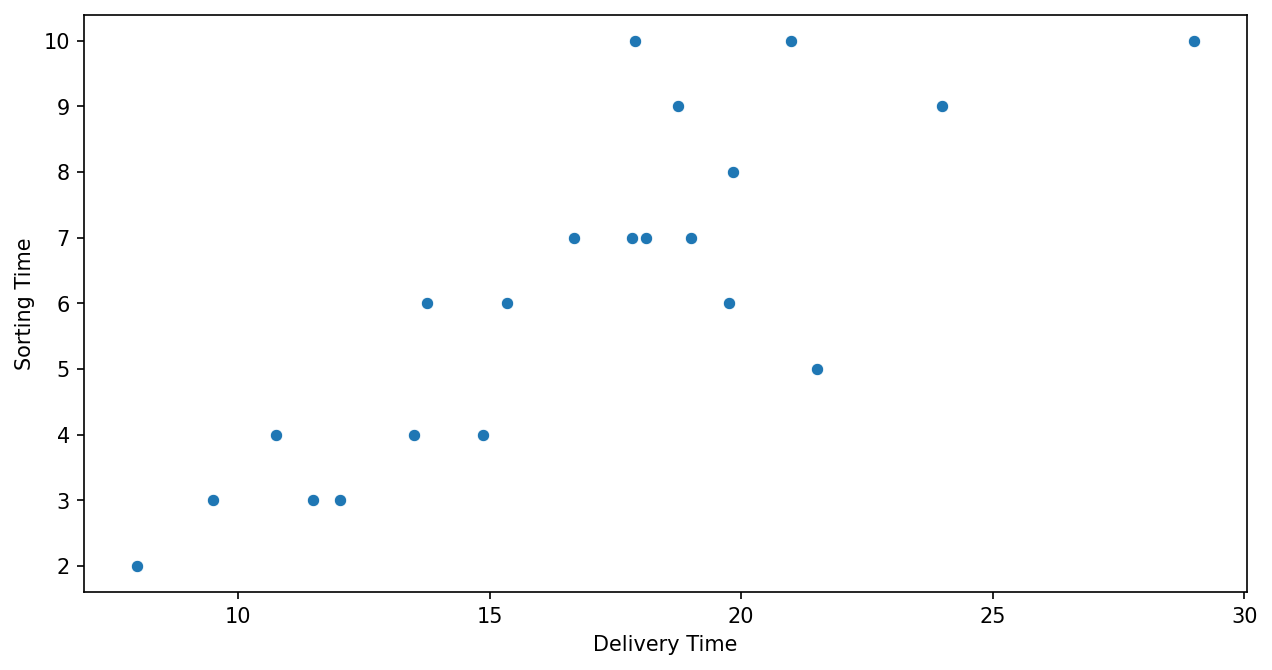

In [8]:
sns.scatterplot(x = df["Delivery Time"], y = df["Sorting Time"])


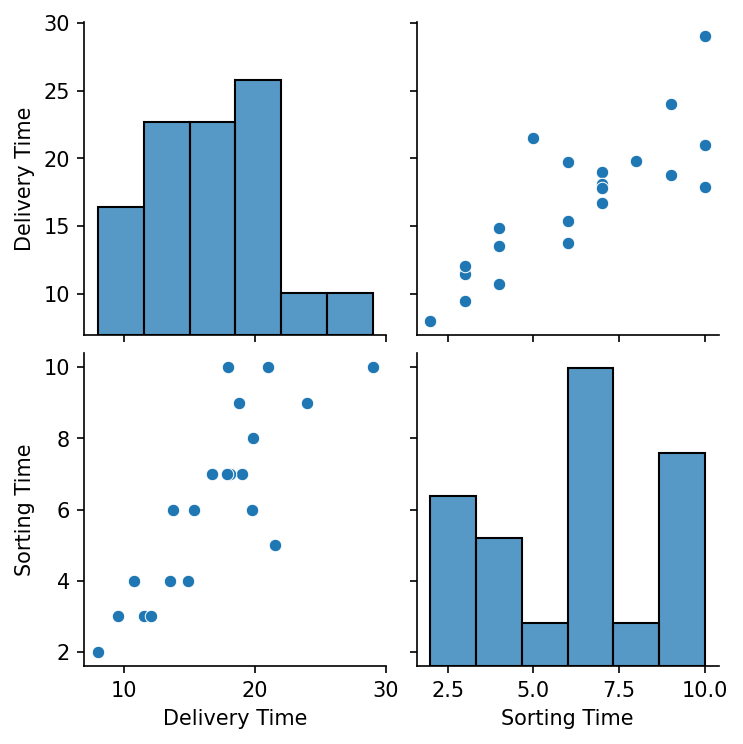

In [9]:
sns.pairplot(df)

<Axes: xlabel='Sorting_time', ylabel='Density'>

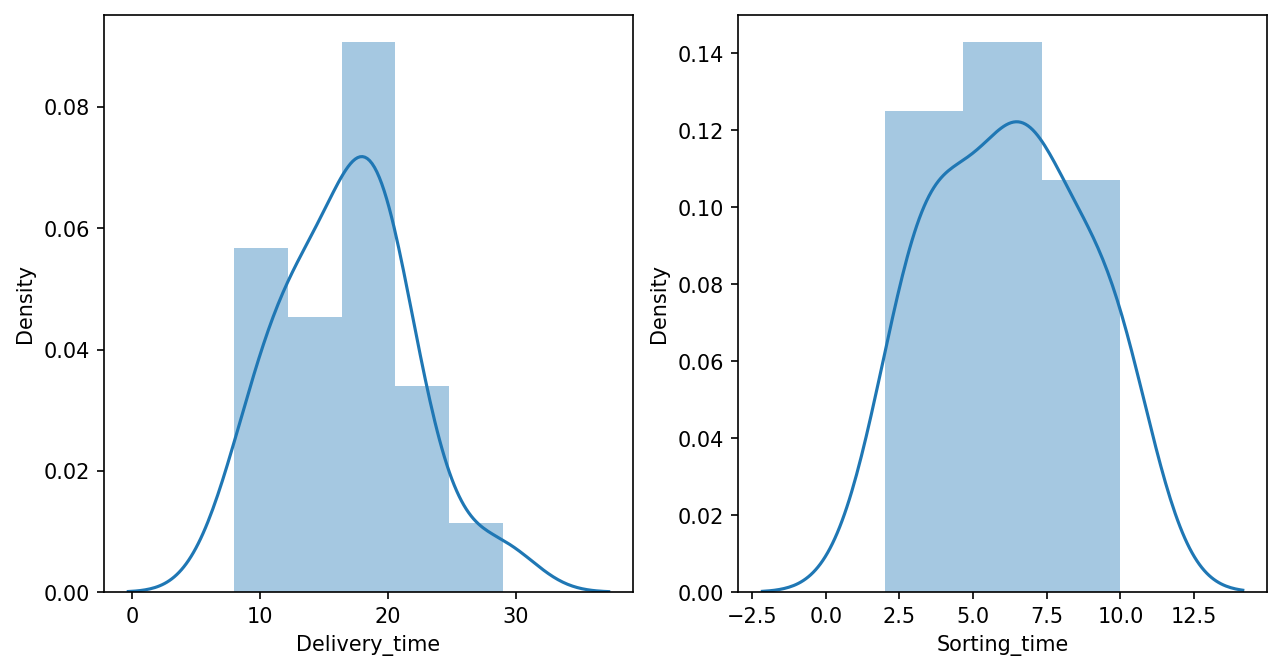

In [10]:
df.rename(columns={"Delivery Time":"Delivery_time", "Sorting Time": "Sorting_time"}, inplace=True)
plt.subplot(1,2,1)
sns.distplot(df["Delivery_time"])

plt.subplot(1,2,2)
sns.distplot(df["Sorting_time"])

In [11]:
df.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


<Axes: >

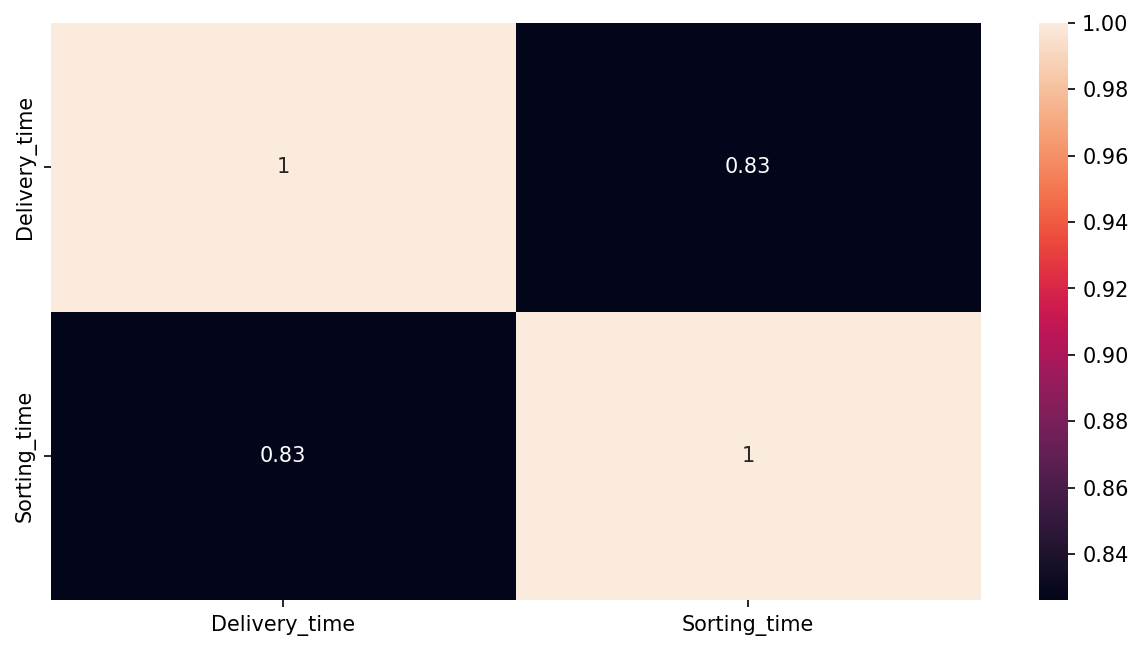

In [12]:
sns.heatmap(df.corr(), annot=True)

Transformation

Log Transformation

<Axes: xlabel='log_sorting_time', ylabel='Density'>

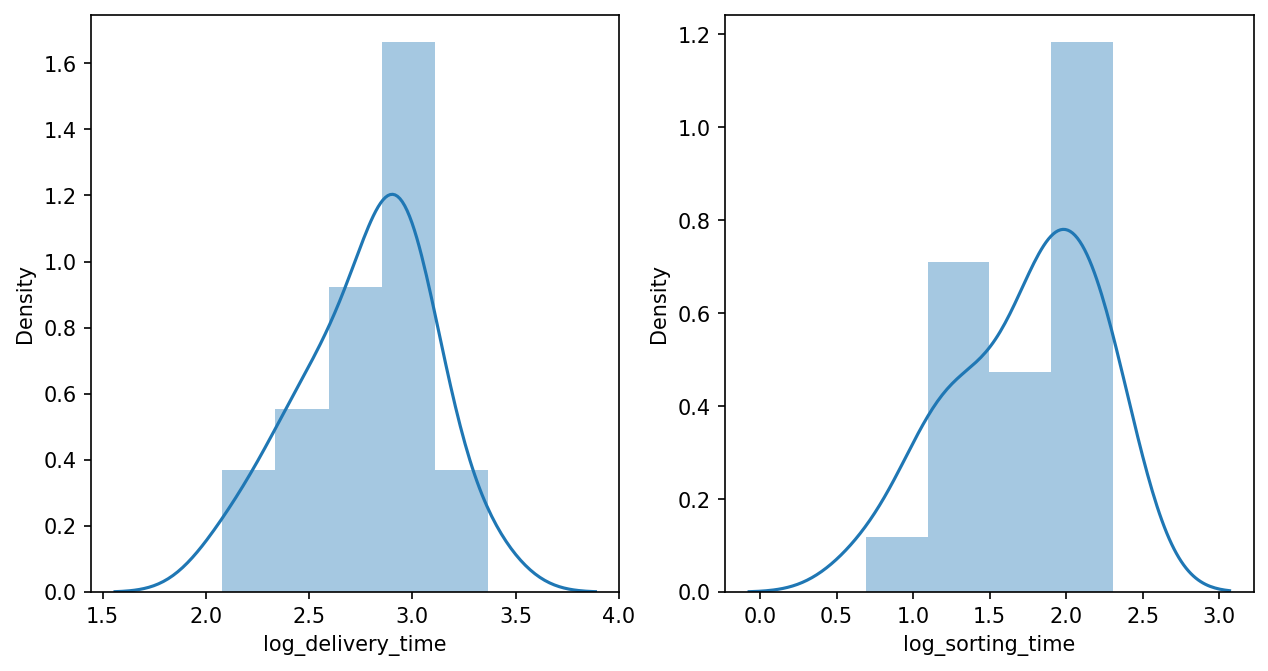

In [13]:

df["log_delivery_time"] = np.log(df["Delivery_time"])
df["log_sorting_time"] = np.log(df["Sorting_time"])

plt.subplot(1,2,1)
sns.distplot(df["log_delivery_time"])

plt.subplot(1,2,2)
sns.distplot(df["log_sorting_time"])


sqrt

<Axes: xlabel='sqrt_sorting_time', ylabel='Density'>

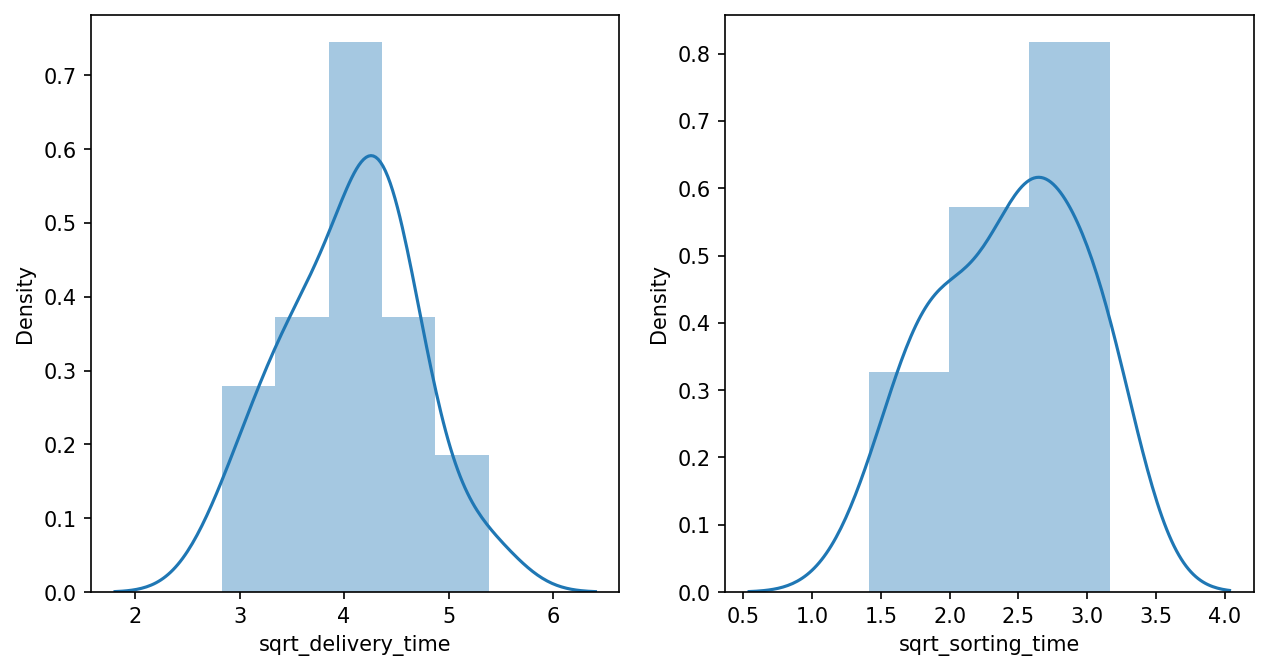

In [14]:


df["sqrt_delivery_time"] = np.sqrt(df["Delivery_time"])
df["sqrt_sorting_time"] = np.sqrt(df["Sorting_time"])

plt.subplot(1,2,1)
sns.distplot(df["sqrt_delivery_time"])

plt.subplot(1,2,2)
sns.distplot(df["sqrt_sorting_time"])

# Model Building

In [15]:
# linear Regression through statsmodel
import statsmodels.formula.api as smf

In [16]:
model = smf.ols("Delivery_time~Sorting_time", data=df).fit()

In [17]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [18]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

Log Transformed data

In [19]:
log_model = smf.ols("log_delivery_time~log_sorting_time", data=df).fit()
log_model.params

Intercept           1.741987
log_sorting_time    0.597522
dtype: float64

In [20]:
log_model.rsquared, log_model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [21]:
#sqrt Transformed data

In [22]:
sqrt_model = smf.ols("sqrt_delivery_time~sqrt_sorting_time", data=df).fit()
sqrt_model.params

Intercept            1.613479
sqrt_sorting_time    1.002217
dtype: float64

In [23]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.7292011987544664, 0.7149486302678594)

In [24]:
#simple Linear Regression using sklearn

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
x = np.array(df['Sorting_time']).reshape((-1, 1))
y = df["Delivery_time"]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [28]:
lr_model.coef_, lr_model.intercept_

(array([1.52971053]), 7.176184210526316)

In [29]:
y_hat = lr_model.predict(x_test)
y_hat

array([13.29502632, 19.41386842, 20.94357895, 10.23560526, 17.88415789])

In [30]:
mse = mean_squared_error(y_test,y_hat)
mse

3.4151904541551223

In [31]:
r2_score(y_test, y_hat)

0.881193344590806

In [32]:
#For origninal Data R-Square is 0.6822714748417231
#for log transformation data R-squred is 0.77216134926874
#for squreroot transfromation data R-squre is 0.7292011987544664
#for sklearn model R-squre is =0.881193344590806
#sklearn  model is best sutaible

# Salary Dataset
Build a prediction model for Salary_hike

In [33]:
sa = pd.read_csv('Salary_Data.csv')
sa

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [34]:
sa.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [35]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [36]:
sa.isna().sum()
sa.duplicated().sum()

0

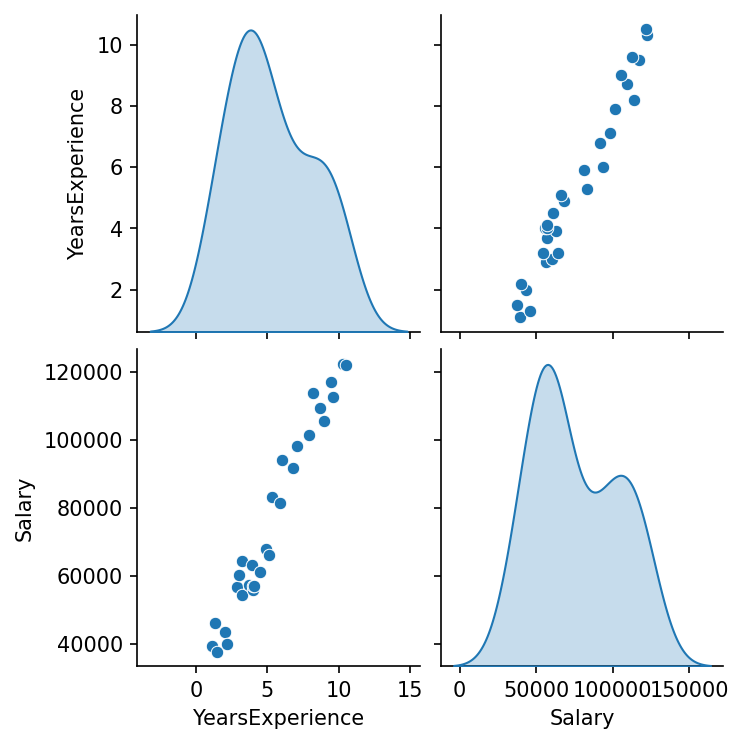

In [37]:
sns.pairplot(data = sa, diag_kind='kde')

<Axes: >

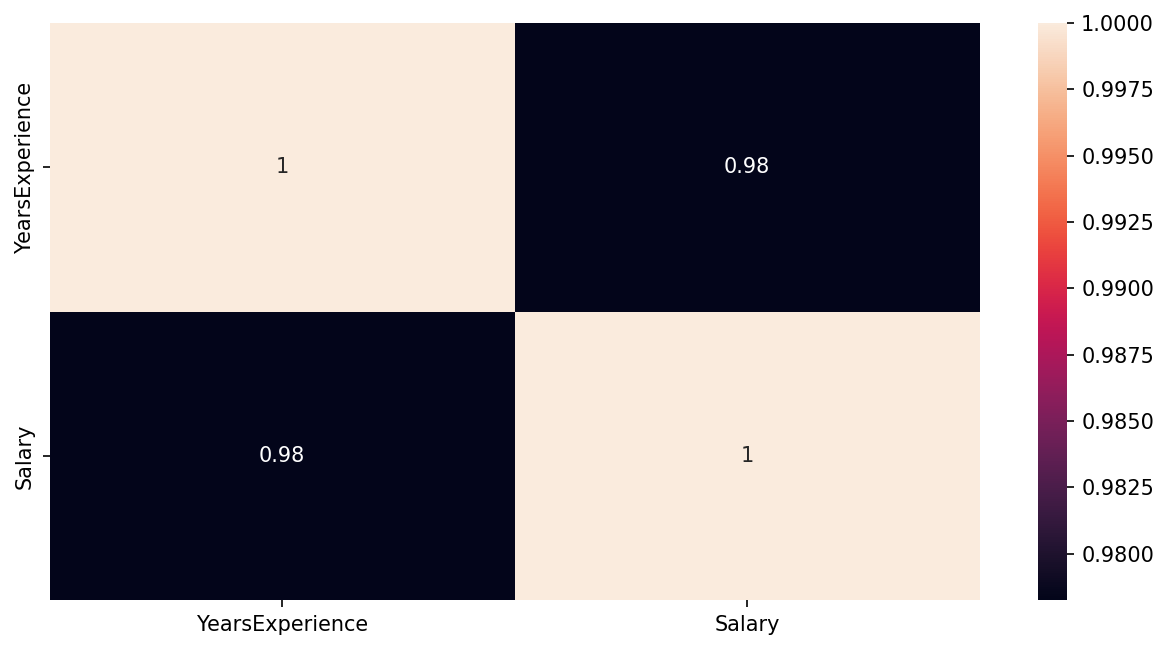

In [38]:
sns.heatmap(sa.corr(),annot=True)

# Transformation


<Axes: xlabel='log_YearsExperience', ylabel='Density'>

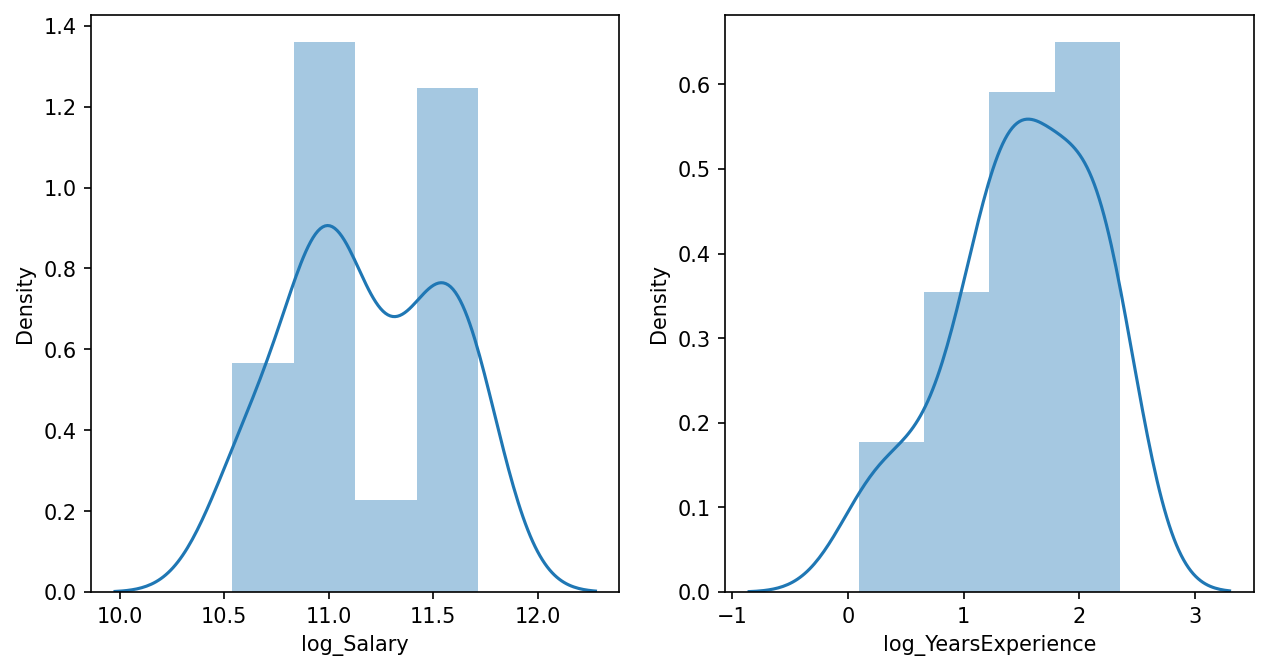

In [39]:
# Log Transformation

sa["log_Salary"] = np.log(sa["Salary"])
sa["log_YearsExperience"] = np.log(sa["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(sa["log_Salary"])

plt.subplot(1,2,2)
sns.distplot(sa["log_YearsExperience"])

<Axes: xlabel='sqrt_YearsExperience', ylabel='Density'>

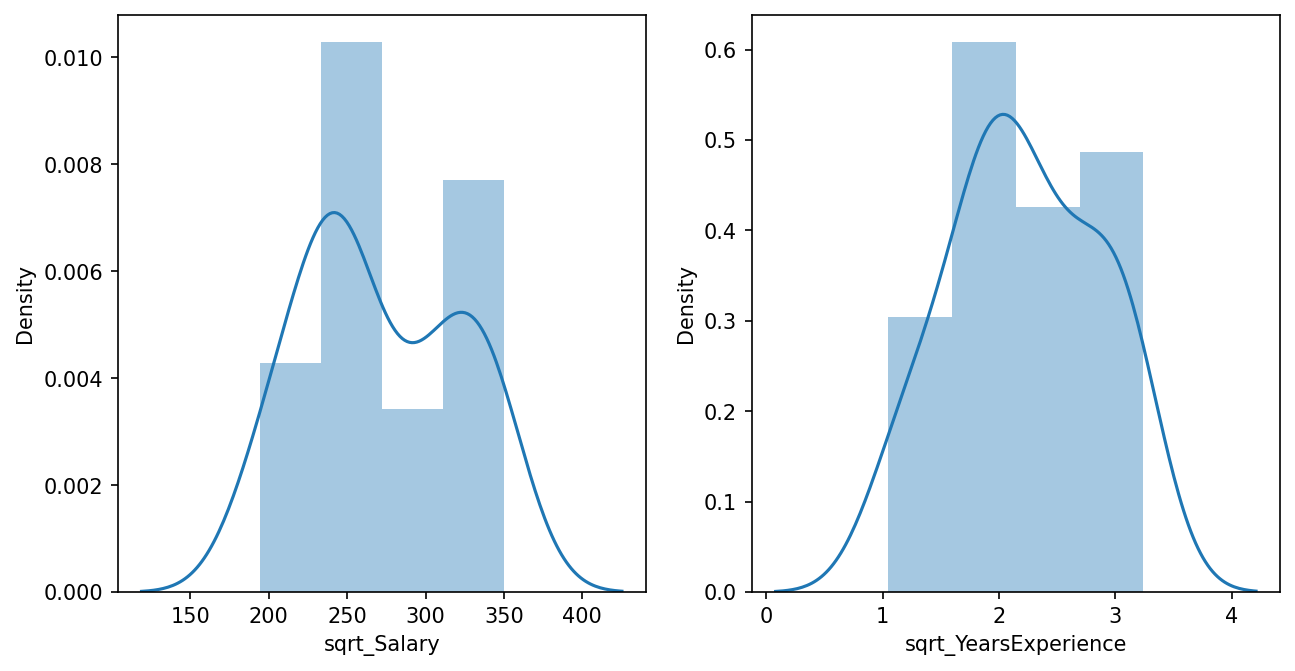

In [40]:

# sqrt Transformation

sa["sqrt_Salary"] = np.sqrt(sa["Salary"])
sa["sqrt_YearsExperience"] = np.sqrt(sa["YearsExperience"])

plt.subplot(1,2,1)
sns.distplot(sa["sqrt_Salary"])

plt.subplot(1,2,2)
sns.distplot(sa["sqrt_YearsExperience"])

#Model Building

In [41]:
# linear Regression through statsmodel
model = smf.ols("Salary~YearsExperience",data = sa).fit()

In [42]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [43]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

##Log Transformed Data

In [56]:
log_model = smf.ols("log_Salary~log_YearsExperience",data = sa).fit()
log_model.params

Intercept              10.328043
log_YearsExperience     0.562089
dtype: float64

In [45]:
log_model.rsquared, log_model.rsquared_adj

(0.905215072581715, 0.9018298966024905)

### 
Sqrt Transformed Data

In [55]:
sqrt_model = smf.ols("sqrt_Salary~sqrt_YearsExperience",data = sa).fit()
sqrt_model.params

Intercept               103.568031
sqrt_YearsExperience     75.626932
dtype: float64

In [47]:
sqrt_model.rsquared, sqrt_model.rsquared_adj

(0.9419490138976826, 0.9398757643940284)

### simple Linear Regression using sklearn

In [48]:
x = np.array(sa['YearsExperience']).reshape((-1, 1))
y = sa['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [49]:
lr_model.coef_, lr_model.intercept_

(array([9440.46383365]), 26040.067657420906)

In [50]:
y_hat = lr_model.predict(x_test)
y_hat

array([ 90235.22172621, 108172.10301013,  56249.55192509,  81738.80427593,
        40200.76340789, 116668.52046041])

In [51]:
mse = mean_squared_error(y_test,y_hat)
mse

4934969.878489006

In [52]:
r2_score(y_test, y_hat)

0.993422386435995

In [53]:
#with the original Data R-square is 0.9569566641435086
#with the log transformated data r-squre is 0.905215072581715
#with sqrt Transformated data r-squre is  0.9419490138976825
#with sklearn model R-squre is 0.993422386435995

In [54]:
#sklearn model is best sutaible